In [40]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

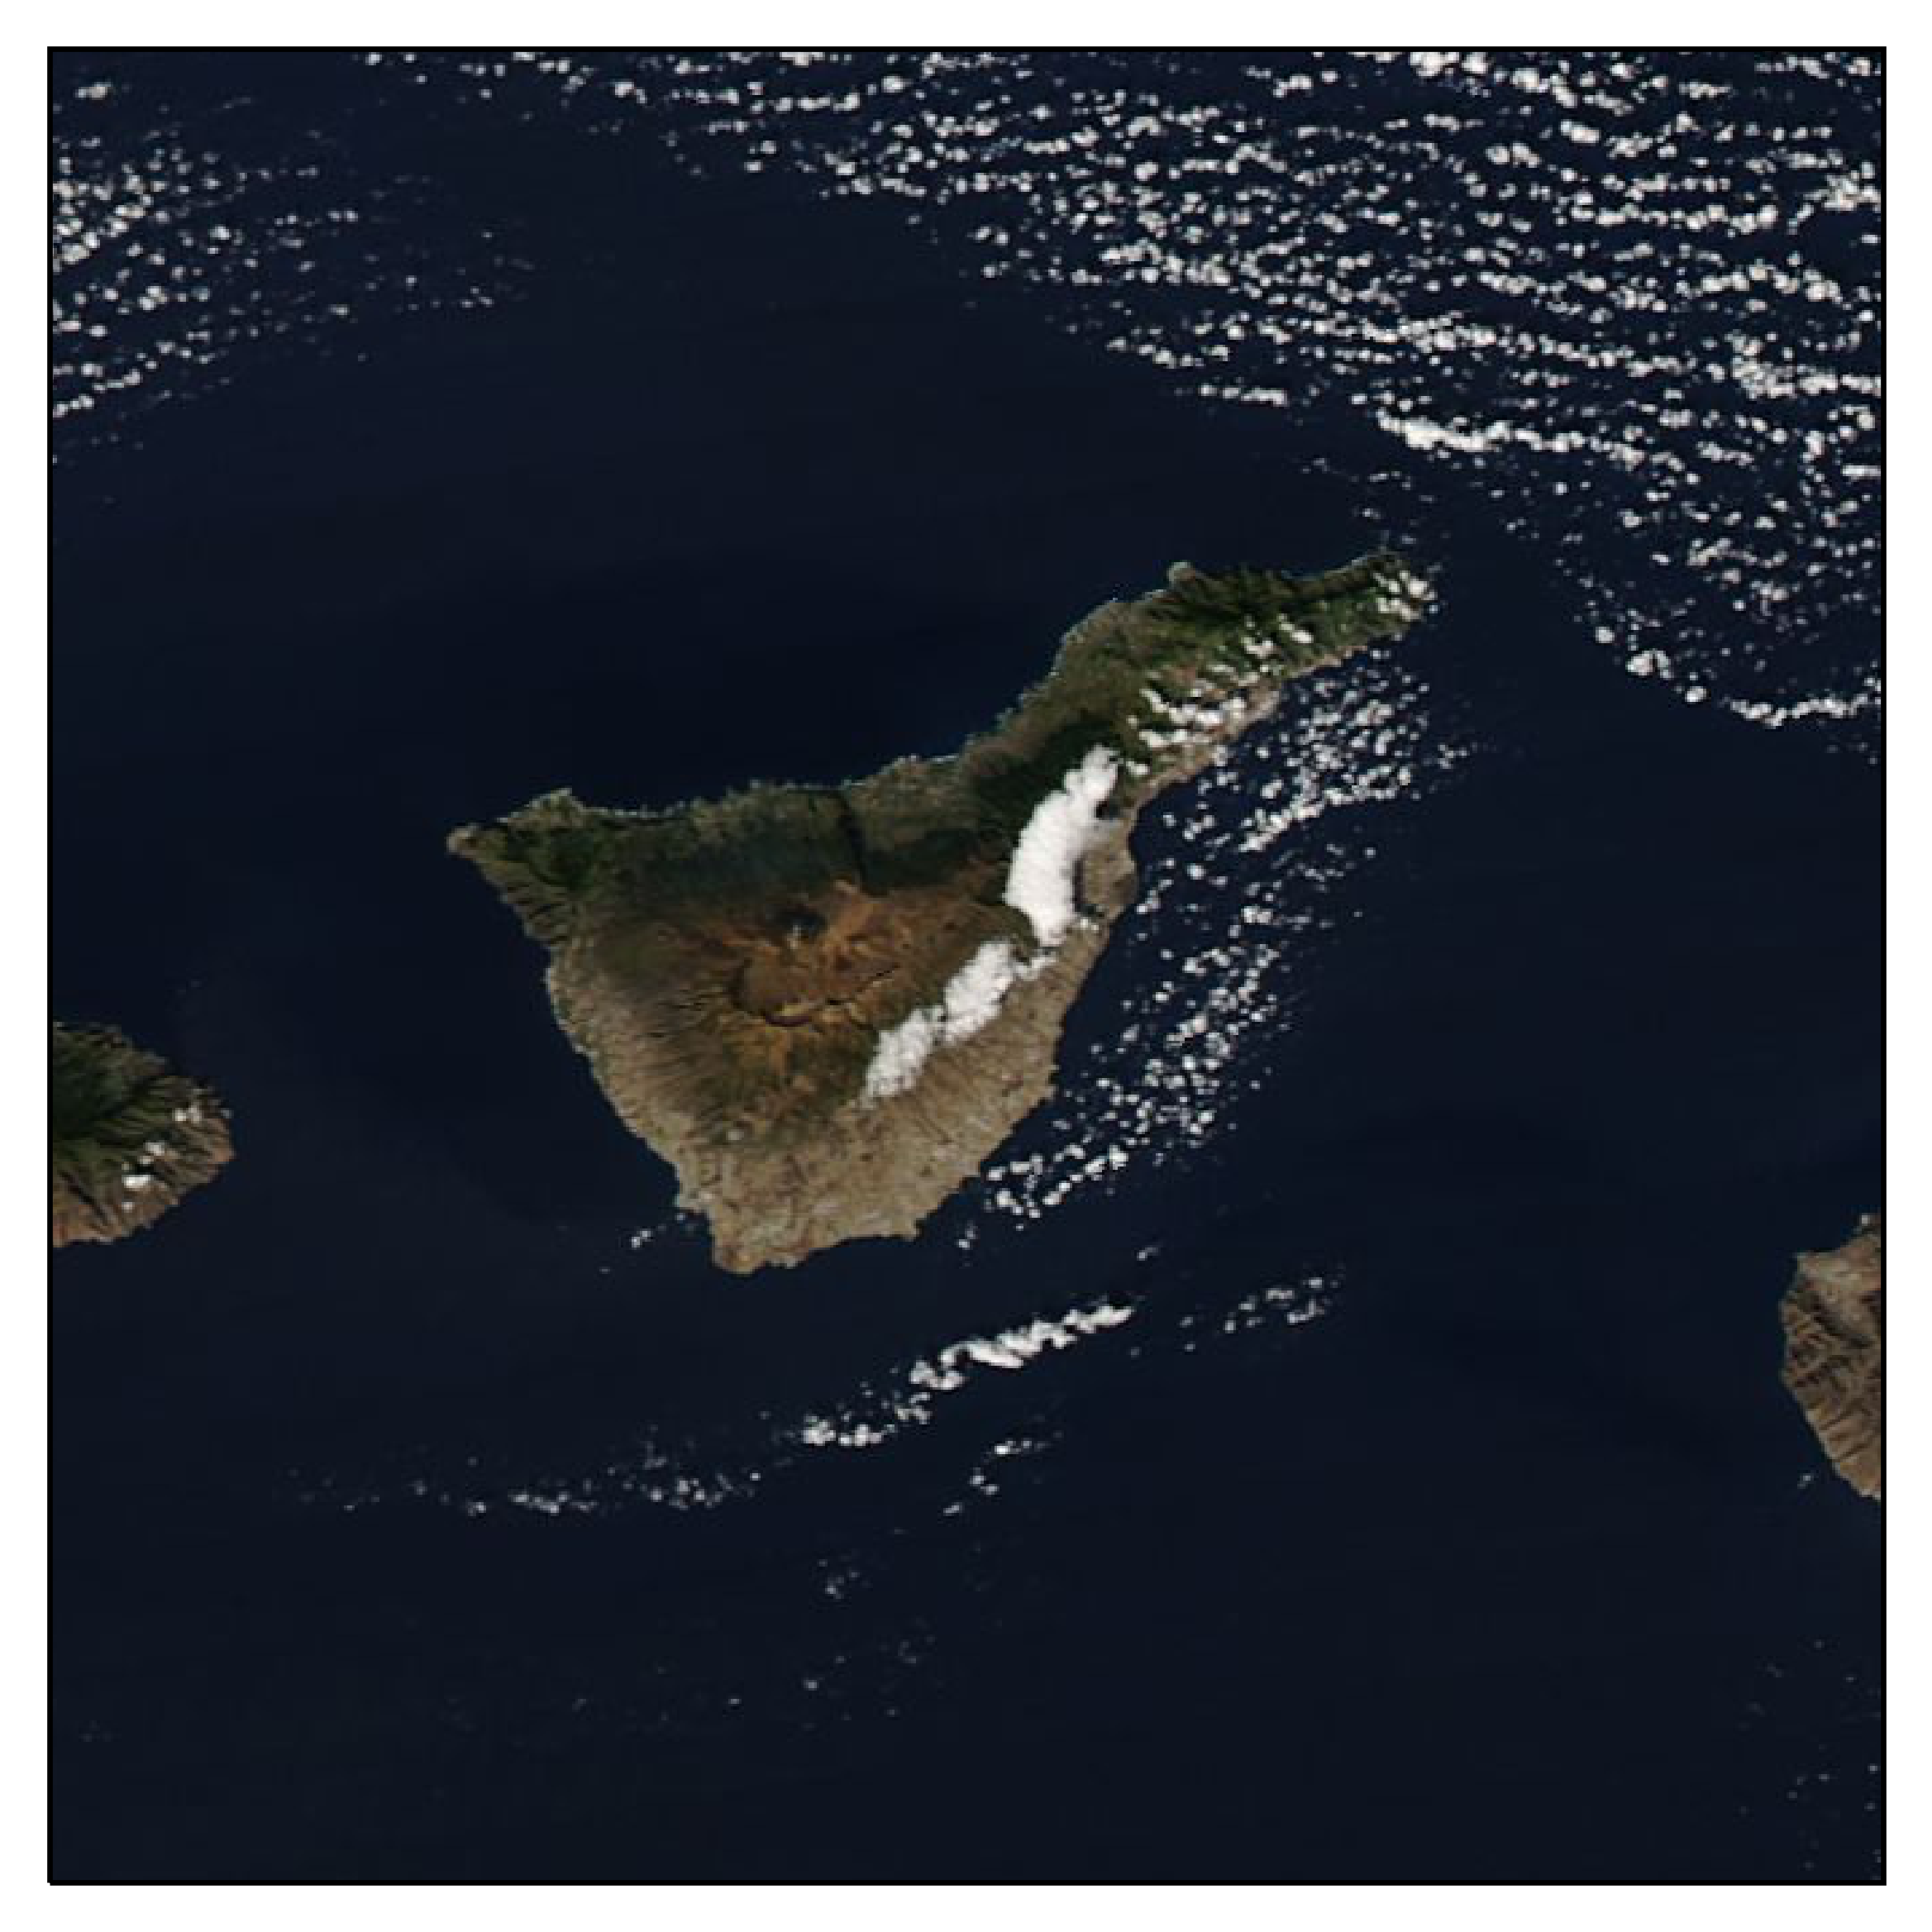

In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'MODIS_Aqua_CorrectedReflectance_TrueColor'

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_wmts(
    url, layer,
    wmts_kwargs={"time":'2020-01-04'})
ax.set_extent((-17.25,-15.75, 27.5,29))
# ax.set_extent((-1,1,-10,10))
f:plt.Figure = plt.gcf()
f.set_dpi(600)
# plt.title('Suomi NPP Earth at night April/October 2012')
plt.show()

In [33]:
from owslib.wms import WebMapService
from IPython.display import Image, display

x1 = -17.25
y1 = 27.5
x2 = -15.75
y2 = 29  

x =x2-x1
y=y2-y1

xy = x/y


In [44]:
res = 800

In [70]:

def get_img(TA,date,dir, extent):
    wms = WebMapService('https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?', version='1.1.1')
    sat = f'MODIS_{TA}_CorrectedReflectance_TrueColor'


    png = f'{dir}{date}_{sat}.png'
    img = wms.getmap(layers=[sat],  # Layers
                     srs='epsg:4326',  # Map projection
                     bbox=extent,  # Bounds
                     size=(int(res), int(res/xy)),  # Image size
                     time=date,  # Time of data
                     format='image/png',  # Image format
                     transparent=True)  # Nodata transparency

    # Save output PNG to a file
    out = open(png, 'wb')
    out.write(img.read())
    out.close()
    return png

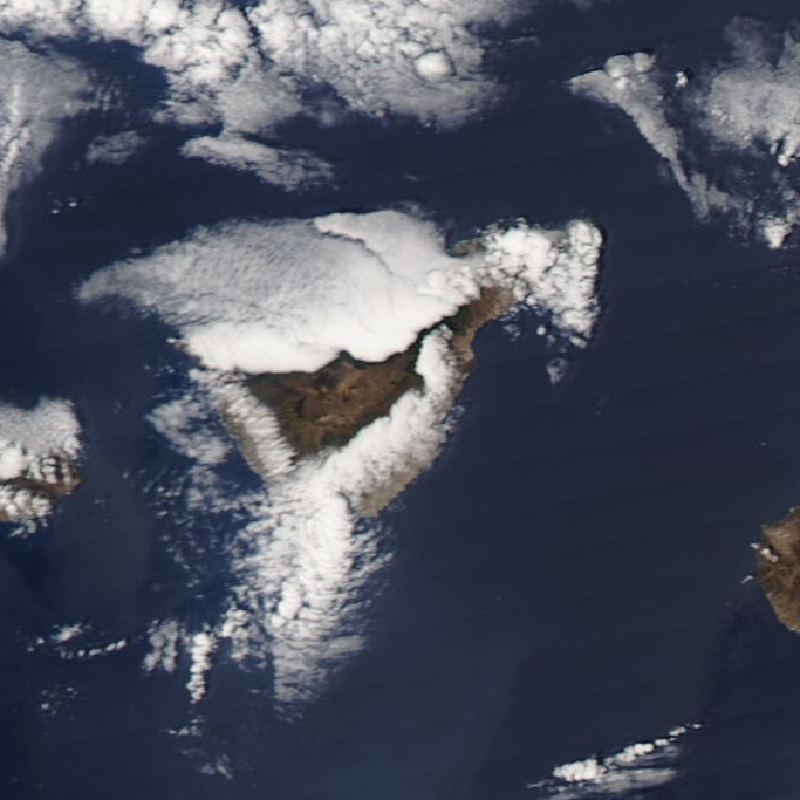

In [60]:


# Connect to GIBS WMS Service

# Configure request for MODIS_Terra_CorrectedReflectance_TrueColor
TA = 'Terra'
date = '2021-09-21'
dir = './data/imgs/'
extent = (x1, y1, x2, y2)



png = get_img(TA,date,dir)
png = get_img('Aqua',date,dir)
# View image
Image(png)

ServiceException: msWMSLoadGetMapParams(): WMS server error. Unable to access -- invalid TIME for LAYER.

In [38]:
t1 = '2022-04-01'
t2 = '2022-07-01'

In [41]:
tt = pd.date_range(t1,t2)

In [69]:
sata = ['Terra','Aqua']

In [68]:
for ss in sata:
    for t in tt:
        try:
            t_ = t.strftime('%Y-%m-%d')
            get_img(ss,t_,dir, extent)
        except: 
            print('fail ',t_)

fail  2022-04-01
fail  2022-04-02
fail  2022-04-03
fail  2022-04-04
fail  2022-04-05
fail  2022-04-06
fail  2022-04-07
fail  2022-04-08
fail  2022-04-09
fail  2022-04-10
fail  2022-04-11
fail  2022-04-12
fail  2022-04-13
fail  2022-04-14
fail  2022-04-15
fail  2022-04-16


In [71]:

dir = './data/imgs1/'
extent = (x1-2, y1-2, x2+2, y2+2)

for ss in sata:
    for t in tt:
        try:
            t_ = t.strftime('%Y-%m-%d')
            get_img(ss,t_,dir, extent)
        except:
            print('fail ',t_)

fail  2022-04-01
fail  2022-04-02
fail  2022-04-03
fail  2022-04-04
fail  2022-04-05
fail  2022-04-06
fail  2022-04-07
fail  2022-04-08
fail  2022-04-09
fail  2022-04-10
fail  2022-04-11
fail  2022-04-12
fail  2022-04-13
fail  2022-04-14
fail  2022-04-15
fail  2022-04-16
